In [1]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df = df.drop("Unnamed: 0",axis = 1)
df.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [2]:
x = df.drop("Class",axis = 1)
y = df["Class"]
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = x.columns
x = pd.DataFrame(scaler.fit_transform(x),columns = columns)
normal_df = pd.concat([x,y],axis=1)


# train, test = train_test_split(normal_df, test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [4]:
#1 KDTree
# function for majority vote selection
def most_frequent(List : list):
    return max(set(List), key = List.count)

from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
kdtree = KDTree(x_train)

k_accuarcy_scores = []

highest_accuracy = 0
best_prediction = None

for k in range(1,31):
    # getting the k nearest indexes to x_test from kdtree
    query_result_indexes = kdtree.query(x_test,k=k,return_distance=False)

    # getting the Class of those k nearest indexes, then use majority vote and append it to the test prediction
    test_prediction=[]
    for row in query_result_indexes:
        result = most_frequent(y_train.loc[y_train.index[row]].tolist())
        test_prediction.append(result)
    test_prediction = pd.DataFrame(test_prediction,columns = ['Predicted Class'])

    # calculating the accuracty using test prediction and actual test values
    accuracy = accuracy_score(test_prediction,y_test)
    print(accuracy)
    k_accuarcy_scores.append([k,accuracy])
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_prediction = test_prediction.copy()

0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9
0.9333333333333333


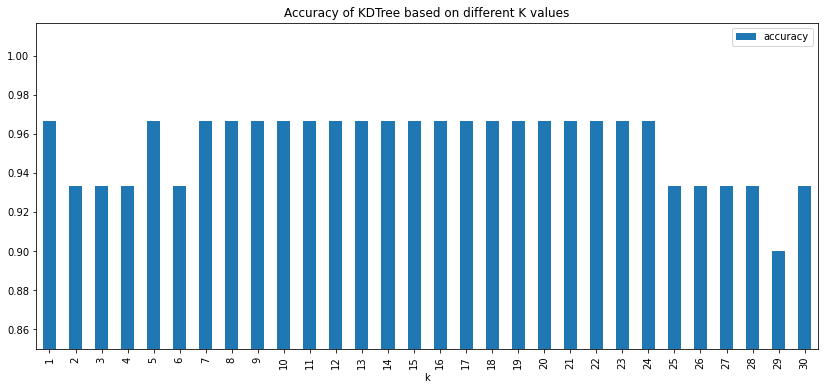

In [5]:
#1 plotting the accuracy for each k in KDTree
import math
accuracy_df = pd.DataFrame(k_accuarcy_scores,columns=['k','accuracy'])
accuracies = accuracy_df.loc[:,"accuracy"].values.tolist()
max_y_lim = max(accuracies) + .05
min_y_lim = min(accuracies) - .05
ax = accuracy_df.plot.bar(title='Accuracy of KDTree based on different K values',x='k',figsize=(14,6),ylim=[min_y_lim,max_y_lim])

<AxesSubplot:title={'center':'KDTree Confusion Matrix'}, xlabel='Predicted labels', ylabel='True labels'>

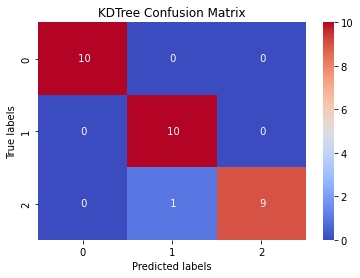

In [6]:
#1 plotting the confusion matrix for the best prediction of KDTree
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, best_prediction)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('KDTree Confusion Matrix')
ax

In [7]:
#2 BallTree

from sklearn.neighbors import BallTree
balltree = BallTree(x_train)

k_accuarcy_scores = []

highest_accuracy = 0
best_prediction = None

for k in range(1,31):
    # getting the k nearest indexes to x_test from balltree
    query_result_indexes = balltree.query(x_test,k=k,return_distance=False)

    # getting the Class of those k nearest indexes, then use majority vote and append it to the test prediction
    test_prediction=[]
    for row in query_result_indexes:
        result = most_frequent(y_train.loc[y_train.index[row]].tolist())
        test_prediction.append(result)
    test_prediction = pd.DataFrame(test_prediction,columns = ['Predicted Class'])

    # calculating the accuracty using test prediction and actual test values
    accuracy = accuracy_score(test_prediction,y_test)
    print(accuracy)
    k_accuarcy_scores.append([k,accuracy])
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_prediction = test_prediction.copy()

0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9
0.9333333333333333


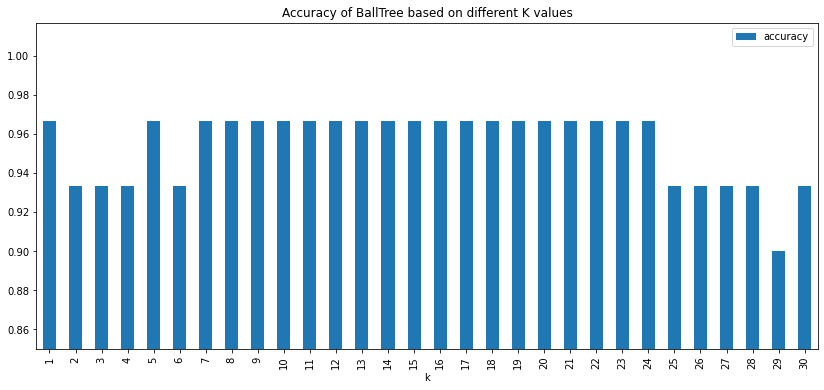

In [8]:
#1 plotting the accuracy for each k in BallTree
import math
accuracy_df = pd.DataFrame(k_accuarcy_scores,columns=['k','accuracy'])
accuracies = accuracy_df.loc[:,"accuracy"].values.tolist()
max_y_lim = max(accuracies) + .05
min_y_lim = min(accuracies) - .05
ax = accuracy_df.plot.bar(title='Accuracy of BallTree based on different K values',x='k',figsize=(14,6),ylim=[min_y_lim,max_y_lim])

<AxesSubplot:title={'center':'BallTree Confusion Matrix'}, xlabel='Predicted labels', ylabel='True labels'>

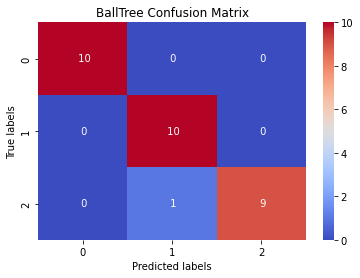

In [9]:
#1 plotting the confusion matrix for the best prediction of BallTree
import seaborn as sns
cm = confusion_matrix(y_test, best_prediction)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('BallTree Confusion Matrix')
ax